UM-01

A. Wyliczyć wskaźnik Satysfakcja z życia dla dwóch innych krajów poza Cyprem (dla których nie ma danych a jest PKB) wyliczona w ten sam sposób jak w przypadku Chin (regresja liniowa, k-sąsiadów, z niepełnymi danymi, z całkowitymi danymi, z regularyzacją - zostawiamy hiperparametry)

B. Wybrać trzy inne wskaźniki i wyliczyć dla Chin oraz wybranych dwóch wcześniej krajów - tak jak satysfakcja z życia dla Chin (regresja liniowa, k-sąsiadów, z niepełnymi danymi, z całkowitymi danymi, opcjonalnie regularyzacja - dla wybitnie zainteresowanych - estymacja manualna hiperparametrów)



**PRBD - UM-01. PODSTAWY**

Twoja firma przechowuje olbrzymie ilości danych (wpisy dzienników zdarzeń, dane finansowe, produkcyjne, pomiary czujników, dane statystyczne, raporty działu HR itd.) i chcesz zwiększyć prawdopodobieństwo wyszukiwania w nich ukrytych skarbów takich jak:
- kategorie klientów oraz określanie najlepszych strategii marketingowych dla każdej z tych grup,
- zoferowanie poszczególnym klientom produktów na podstawie danych zebranych od podobnych klientów,
- wykrywanie potencjalnie nielegalnych transakcji,
- przewidywanie przyszłorocznych obrotów,
- i inne (https://www.kaggle.com/datasets).

wykorzystamy do tego Uczenie Maszynowe

Zaczynamy !

Skorzytamy z gotowej biblioteki:

Biblioteka Scikit-Learn (http://scikit-learn.org/stable/) jest bardzo przystępna, a jednocześnie zawiera wiele wydajnych algorytmów uczenia maszynowego; z tego powodu znakomicie nadaje się dla osób rozpoczynających przygodę z uczeniem maszynowym.

# Konfiguracja

Upewnijmy się najpierw, że notatnik ten będzie działał w środowiskach Python 2 i 3 (BARDZO, BARDZO REKOMENDOWANY), importujmy kilka powszechnie stosowanych modułów, upewnijmy się, że moduł MatplotLib będzie prawidłowo tworzył wykresy, a także przygotujmy funkcję zapisującą rysunki:

In [1]:
# Obsługa środowisk Python 2 i Python 3
from __future__ import division, print_function, unicode_literals

# Importowanie popularnych modułów
import numpy as np
import os

# W celu zachowania powtarzalności wyników w kolejnych przebiegach
np.random.seed(42)

# Generowanie ładnych wykresów
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Lokacja, w której będą zapisywane rysunki
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "podstawy"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "rysunki", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    os.makedirs(IMAGES_PATH, exist_ok=True)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Zapisywanie rysunku", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# Ignorowanie "useless warnings" (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Kod 1.1 - PIENIĄDZE SZCZĘŚCIA NIE DAJĄ... A MOŻE JEDNAK TAK... ?

ZACZYNAMY!

Poniższa funkcja scala dane dotyczące satysfkacji z życia z zestawu OECD oraz informacje o PKB per capita.

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices)) # MK: usuwanie kraju
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

Kod pobiera dane z katalogu zestawy_danych/satysfakcja.

In [3]:
import os
datapath = os.path.join("zestawy_danych", "satysfakcja", "")

# Download the data
import urllib
DOWNLOAD_ROOT = "http://users.pja.edu.pl/~adamkass/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Pobieranie", filename)
    url = DOWNLOAD_ROOT + "zestawy_danych/satysfakcja/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

Pobieranie oecd_bli_2015.csv
Pobieranie gdp_per_capita.csv


Kod służy do wczytywania danych, ich przygotowania, utworzenia wykresu, a także wyuczenia modelu liniowego i prognozowania wyników

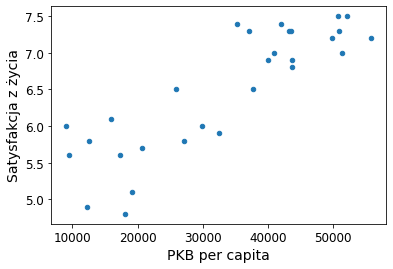

[[5.2454361]]


In [4]:
# Importowane klasy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Wczytuje dane
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Przygotowuje dane
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

# MK: usuniecie niepotrzebnych prostych
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

country_stats.rename(columns={"GDP per capita": "PKB per capita"}, inplace=True)
country_stats.rename(columns={"Life satisfaction": "Satysfakcja z życia"}, inplace=True)

# Wizualizuje dane
country_stats.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia')
plt.show()


# Wybiera model liniowy
model = sklearn.linear_model.LinearRegression()

# Uczy model
model.fit(X, y)

# Oblicza prognozy dla Chin - nie ma w zestawieniu !
X_new = [[7989]]  # PKB per capita Chin
print(model.predict(X_new)) # wyniki satysfakcja z życia[[5.2454361]]



In [19]:
# Oblicza prognozy dla Cypru - nie ma w zestawieniu !
X_new = [[22587]]  # PKB per capita Cypru
print(model.predict(X_new)) # wyniki satysfakcja z życia[[5.76666667]]
# print(model1.predict(X_new)) # wyniki jakość wody [[81.66666667]]
# print(model2.predict(X_new)) # wyniki wskaźnik zabójstw[[0.7]]
# print(model3.predict(X_new)) # wyniki średnia długość życia[[81.06666667]]

[[5.96242338]]


In [20]:
# Oblicza prognozy dla Litwy - nie ma w zestawieniu !
X_new = [[14210]]  # PKB per capita Litwy
print(model.predict(X_new)) # wyniki satysfakcja z życia[[5.6]]
# print(model1.predict(X_new)) # wyniki jakość wody [[79.]]
# print(model2.predict(X_new)) # wyniki wskaźnik zabójstw[[0.7]]
# print(model3.predict(X_new)) # wyniki średnia długość życia[[1.13333333]]

[[5.55098329]]


In [21]:
country_stats

PKB per capita  Satysfakcja z życia
Country                                             
Russia                 9054.914                  6.0
Turkey                 9437.372                  5.6
Hungary               12239.894                  4.9
Poland                12495.334                  5.8
Slovak Republic       15991.736                  6.1
Estonia               17288.083                  5.6
Greece                18064.288                  4.8
Portugal              19121.592                  5.1
Slovenia              20732.482                  5.7
Spain                 25864.721                  6.5
Korea                 27195.197                  5.8
Italy                 29866.581                  6.0
Japan                 32485.545                  5.9
Israel                35343.336                  7.4
New Zealand           37044.891                  7.3
France                37675.006                  6.5
Belgium               40106.632                  6.9
Germany               40996.511                  7.0
Finland               41973.988                  7.4
Canada                43331.961                  7.3
Netherlands           43603.115                  7.3
Austria               43724.031                  6.9
United Kingdom        43770.688                  6.8
Sweden                49866.266                  7.2
Iceland               50854.583                  7.5
Australia             50961.865                  7.3
Ireland               51350.744                  7.0
Denmark               52114.165                  7.5
United States         55805.204                  7.2

In [27]:
#wybieram wskaźniki do dalszych obliczen
oecd_bli.columns
#'Water quality'
#'Homicide rate'
#'Life expectancy'

Index(['Air pollution', 'Assault rate', 'Consultation on rule-making',
       'Dwellings without basic facilities', 'Educational attainment',
       'Employees working very long hours', 'Employment rate',
       'Wskaźnik zabójstw', 'Household net adjusted disposable income',
       'Household net financial wealth', 'Housing expenditure', 'Job security',
       'Średnia długość życia', 'Satysfakcja z życia',
       'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Rooms per person',
       'Self-reported health', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Jakość wody', 'Years in education'],
      dtype='object', name='Indicator')

In [28]:
gdp_per_capita[['GDP per capita']].loc[['Cyprus','Lithuania','China']]


KeyError: "None of [Index(['GDP per capita'], dtype='object')] are in the [columns]"

Uczenie z przykładów/z modelu

Większość zadań uczenia maszynowego polega na sporządzaniu prognoz. Oznacza to, że na podstawie określonej
liczby próbek uczących system musi być w stanie generalizować wyniki na niewidziane wcześniej przykłady. Uzyskanie dobrej szybkości algorytmu wobec danych uczących jest pożądane, ale niewystarczające; prawdziwy cel stanowi dobra wydajność wobec nowych przykładów.

Znamy dwa główne mechanizmy uogólniania: uczenie z przykładów (o tym dalej) i uczenie z modelu.


Dobrym sposobem uogólniania wyników uzyskiwanych z danych uczących jest stworzenie modelu z tych przykładów i użycie go do przewidywania (prognozowania; ang. prediction). Jest to uczenie z modelu (ang. model-based learning).

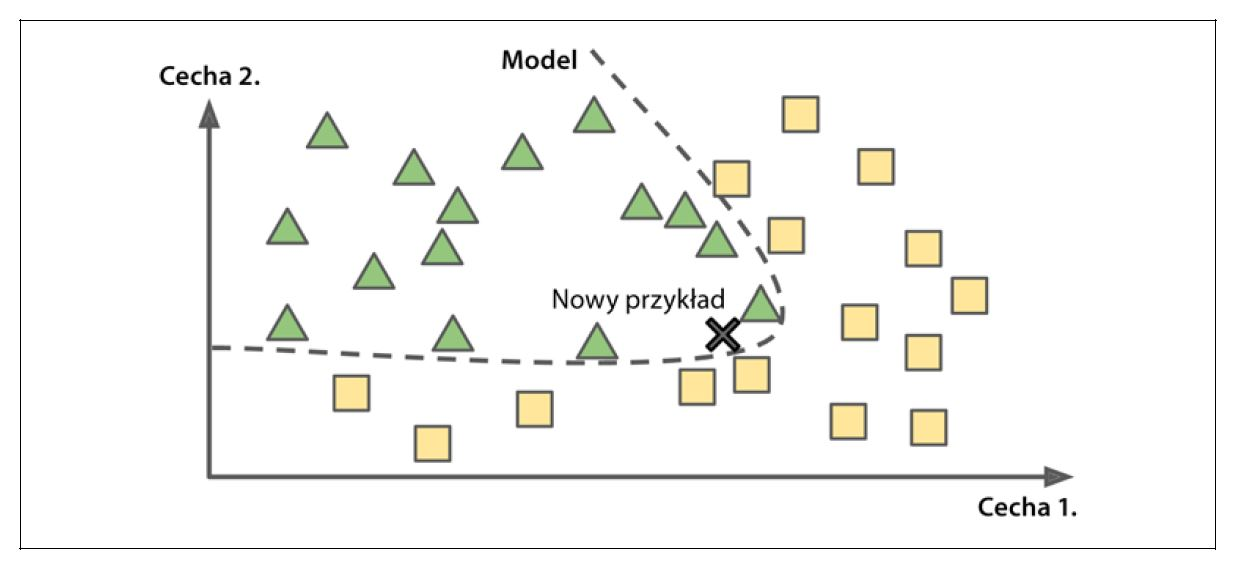

Chcemy sprawdzić, czy pieniądze dają szczęście; w tym celu pobieramy dane Better Life Index ze strony Organizacji Współpracy Gospodarczej i Rozwoju (OECD,http://stats.oecd.org/index.aspx?DataSetCode=BLI),
a także statystyki PKB per capita z witryny Międzynarodowego Funduszu Walutowego (IMF, http://goo.gl/j1MSKe).

Teraz wystarczy połączyć obydwie tabele i posortować dane dotyczące PKB. Tabela ponizej prezentuje fragment uzyskanych informacji.
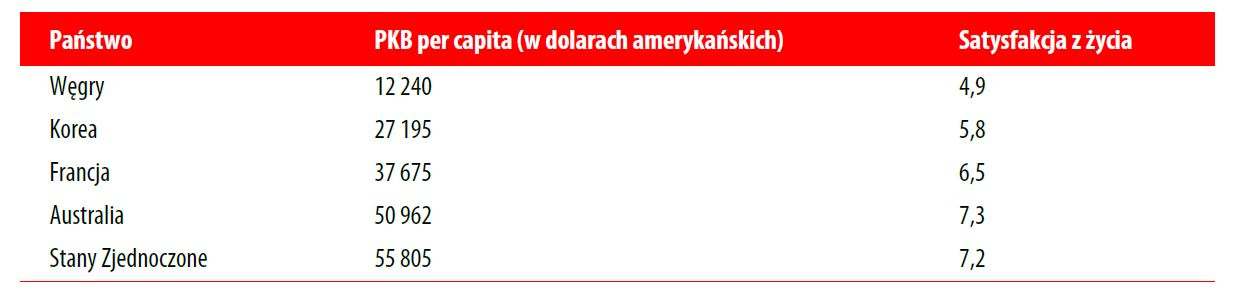

# Wczytanie i przygotowanie danych satysfakcji z życia

In [29]:
import pandas as pd

# Plik CSV do pobrania na stronie http://stats.oecd.org/index.aspx?DataSetCode=BLI

datapath = "zestawy_danych/satysfakcja/"

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

oecd_bli = pd.read_csv(datapath+"oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

Indicator  Air pollution  Assault rate  Consultation on rule-making  \
Country                                                               
Australia           13.0           2.1                         10.5   
Austria             27.0           3.4                          7.1   

Indicator  Dwellings without basic facilities  Educational attainment  \
Country                                                                 
Australia                                 1.1                    76.0   
Austria                                   1.0                    83.0   

Indicator  Employees working very long hours  Employment rate  Homicide rate  \
Country                                                                        
Australia                              14.02             72.0            0.8   
Austria                                 7.61             72.0            0.4   

Indicator  Household net adjusted disposable income  \
Country                                               
Australia                                   31588.0   
Austria                                     31173.0   

Indicator  Household net financial wealth  ...  Long-term unemployment rate  \
Country                                    ...                                
Australia                         47657.0  ...                         1.08   
Austria                           49887.0  ...                         1.19   

Indicator  Personal earnings  Quality of support network  Rooms per person  \
Country                                                                      
Australia            50449.0                        92.0               2.3   
Austria              45199.0                        89.0               1.6   

Indicator  Self-reported health  Student skills  \
Country                                           
Australia                  85.0           512.0   
Austria                    69.0           500.0   

Indicator  Time devoted to leisure and personal care  Voter turnout  \
Country                                                               
Australia                                      14.41           93.0   
Austria                                        14.46           75.0   

Indicator  Water quality  Years in education  
Country                                       
Australia           91.0                19.4  
Austria             94.0                17.0  

[2 rows x 24 columns]

In [30]:
oecd_bli.rename(columns={"Life satisfaction": "Satysfakcja z życia"}, inplace=True)
oecd_bli.rename(columns={"Water quality": "Jakość wody"}, inplace=True)
oecd_bli.rename(columns={"Homicide rate": "Wskaźnik zabójstw"}, inplace=True)
oecd_bli.rename(columns={"Life expectancy": "Średnia długość życia"}, inplace=True)

oecd_bli[["Satysfakcja z życia","Jakość wody","Wskaźnik zabójstw","Średnia długość życia"]].head()

Indicator  Satysfakcja z życia  Jakość wody  Wskaźnik zabójstw  \
Country                                                          
Australia                  7.3         91.0                0.8   
Austria                    6.9         94.0                0.4   
Belgium                    6.9         87.0                1.1   
Brazil                     7.0         72.0               25.5   
Canada                     7.3         91.0                1.5   

Indicator  Średnia długość życia  
Country                           
Australia                   82.1  
Austria                     81.0  
Belgium                     80.5  
Brazil                      73.7  
Canada                      81.5

# Wczytanie i przygotowanie danych PKB per capita

In [31]:
# Plik xls do pobrania na stronie http://goo.gl/j1MSKe (=> imf.org) -> zmien nazwe na gdp_per_capita.csv
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "PKB per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(2)

Subject Descriptor         Units  \
Country                                                                        
Afghanistan  Gross domestic product per capita, current prices  U.S. dollars   
Albania      Gross domestic product per capita, current prices  U.S. dollars   

             Scale                      Country/Series-specific Notes  \
Country                                                                 
Afghanistan  Units  See notes for:  Gross domestic product, curren...   
Albania      Units  See notes for:  Gross domestic product, curren...   

             PKB per capita  Estimates Start After  
Country                                             
Afghanistan         599.994                 2013.0  
Albania            3995.383                 2010.0

In [16]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="PKB per capita", inplace=True)
full_country_stats

3.94             72.0   
Netherlands                                   0.45             74.0   
Austria                                       7.61             72.0   
United Kingdom                               12.70             71.0   
Sweden                                        1.13             74.0   
Iceland                                      12.25             82.0   
Australia                                    14.02             72.0   
Ireland                                       4.20             60.0   
Denmark                                       2.03             73.0   
United States                                11.30             67.0   
Norway                                        2.82             75.0   
Switzerland                                   6.72             80.0   
Luxembourg                                    3.47             66.0   

                 Wskaźnik zabójstw  Household net adjusted disposable income  \
Country                                                                        
Brazil                        25.5                                   11664.0   
Mexico                        23.4                                   13085.0   
Russia                        12.8                                   19292.0   
Turkey                         1.2                                   14095.0   
Hungary                        1.3                                   15442.0   
Poland                         0.9                                   17852.0   
Chile                          4.4                                   14533.0   
Slovak Republic                1.2                                   17503.0   
Czech Republic                 0.8                                   18404.0   
Estonia                        4.8                                   15167.0   
Greece                         1.6                                   18575.0   
Portugal                       1.1                                   20086.0   
Slovenia                       0.4                                   19326.0   
Spain                          0.6                                   22477.0   
Korea                          1.1                                   19510.0   
Italy                          0.7                                   25166.0   
Japan                          0.3                                   26111.0   
Israel                         2.3                                   22104.0   
New Zealand                    1.2                                   23815.0   
France                         0.6                                   28799.0   
Belgium                        1.1                                   28307.0   
Germany                        0.5                                   31252.0   
Finland                        1.4                                   27927.0   
Canada                         1.5                                   29365.0   
Netherlands                    0.9                                   27888.0   
Austria                        0.4                                   31173.0   
United Kingdom                 0.3                                   27029.0   
Sweden                         0.7                                   29185.0   
Iceland                        0.3                                   23965.0   
Australia                      0.8                                   31588.0   
Ireland                        0.8                                   23917.0   
Denmark                        0.3                                   26491.0   
United States                  5.2                                   41355.0   
Norway                         0.6                                   33492.0   
Switzerland                    0.5                                   33491.0   
Luxembourg                     0.4                                   38951.0   

                 Household net financial wealth  ...  \
Country                  

In [34]:
# MK: wybór - Switzerland
full_country_stats[["PKB per capita", 'Satysfakcja z życia']].loc["Switzerland"]

PKB per capita         80675.308
Satysfakcja z życia        7.500
Name: Switzerland, dtype: float64

In [35]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

#full_data = full_country_stats[["PKB per capita", 'Satysfakcja z życia','Jakość wody','Wskaźnik zabójstw','Średnia długość życia']]
sample_data = full_country_stats[["PKB per capita", 'Satysfakcja z życia']].iloc[keep_indices]
missing_data = full_country_stats[["PKB per capita", 'Satysfakcja z życia']].iloc[remove_indices]

Wygenerujmy teraz wykres danych dla kilku przykładowych krajów:

Zapisywanie rysunku wykres_punktowy_pieniądze_i_szczęście


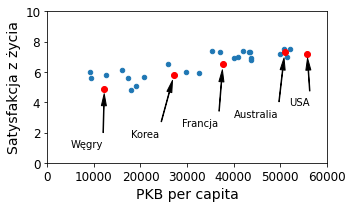

In [36]:
sample_data.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
#pozycjonowanie textu
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data[["PKB per capita","Satysfakcja z życia"]].loc[country]
    country = "USA" if country == "United States" else country
    country = "Węgry" if country == "Hungary" else country
    country = "Francja" if country == "France" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
save_fig('wykres_punktowy_pieniądze_i_szczęście')
plt.show()

Możemy dostrzec tu pewien trend! Pomimo tego, że dane są zaszumione (tzn. częściowo losowe), wygląda na to, że poziom satysfakcji z życia wzrasta w sposób mniej więcej liniowy wraz ze wzrostem produktu krajowego brutto na osobę. Postanawiamy zatem stworzyć model satysfakcji z życia jako funkcji liniowej wobec parametru PKB per capita. Etap ten nazywamy doborem modelu: wybraliśmy model liniowy satysfakcji z życia wykorzystujący tylko jeden atrybut — PKB per capita 

In [291]:
sample_data.to_csv("satysfakcja_z_życia_a_PKB_per_capita.csv") # export do csv

In [292]:
sample_data.loc[list(position_text.keys())]

PKB per capita  Satysfakcja z życia  Jakość wody  \
Country                                                           
Hungary             12239.894                  4.9         77.0   
Korea               27195.197                  5.8         78.0   
France              37675.006                  6.5         82.0   
Australia           50961.865                  7.3         91.0   
United States       55805.204                  7.2         85.0   

               Wskaźnik zabójstw  Średnia długość życia  
Country                                                  
Hungary                      1.3                   75.2  
Korea                        1.1                   81.3  
France                       0.6                   82.1  
Australia                    0.8                   82.1  
United States                5.2                   78.7

Prosty model liniowy:

satysfakcja_z_życia = $\theta_0 + \theta_1$ x PKB_per_capita

Model ten zawiera dwa parametry: $\theta_0 , \theta_1$
 
Poprzez modyfikowanie tych parametrów możemy za ich pomocą uzyskać dowolną funkcję liniową

Zapisywanie rysunku wykres_do_poprawki_parametry_modelu


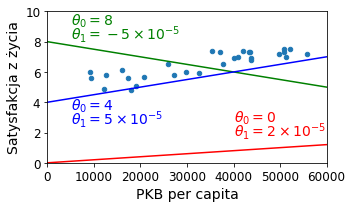

In [293]:
import numpy as np

sample_data.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")
plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")
save_fig('wykres_do_poprawki_parametry_modelu')
plt.show()

Zanim zaczniemy korzystać z modelu, musimy zdefiniować wartości jego parametrów $\theta_0$ i $\theta_1$. 

Skąd mamy wiedzieć, które wartości nadają się najlepiej dla danego modelu? 

Możemy wyznaczyć funkcję użyteczności (zwaną także funkcją dopasowania), mówiącą nam, jak dobry jest dany model, lub funkcję kosztu, mającą przeciwne zastosowanie. 

W zagadnieniach wykorzystujących regresję liniową zazwyczaj jest stosowana funkcja kosztu mierząca odległości pomiędzy przewidywaniami modelu liniowego a przykładami uczącymi.

Naszym zadaniem jest zminimalizowanie tego dystansu.

Wykorzystamy algorytm regresji liniowej: dostarczamy mu dane uczące, a on określa parametry najlepiej pasujące do danego modelu liniowego. Proces ten nosi nazwę uczenia (trenowania) modelu. W naszym przykładzie algorytm regresji liniowej wyznacza następujące optymalne wartości parametrów: $\theta_0 = 4.85$ i $\theta_1 = 4.91 \times 10^{-5}$.

In [294]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["PKB per capita"]]
ysample = np.c_[sample_data["Satysfakcja z życia"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(4.853052800266436, 4.911544589158483e-05)

In [295]:
t01, t11

(65.90693670226298, 0.0005087967974272954)

In [296]:
t02, t12

(3.323183601914576, -5.170833880682502e-05)

In [297]:
t03, t13

(75.58159073739606, 0.00013159751869894787)

Teraz nasz model jest maksymalnie dopasowany do danych uczących (jak na model liniowy)

Zapisywanie rysunku wykres_najlepiej_dopasowanego_modelu


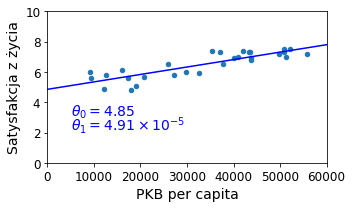

In [298]:
sample_data.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
save_fig('wykres_najlepiej_dopasowanego_modelu')
plt.show()


Zapisywanie rysunku wykres_najlepiej_dopasowanego_modelu


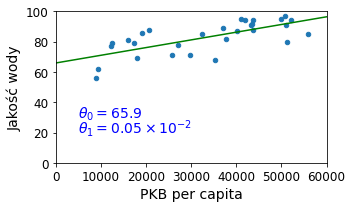

In [299]:
sample_data.plot(kind='scatter', x="PKB per capita", y='Jakość wody', figsize=(5,3))
plt.axis([0, 60000, 0, 100])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t01 + t11*X, "g")
plt.text(5000, 30, r"$\theta_0 = 65.9$", fontsize=14, color="b")
plt.text(5000, 20, r"$\theta_1 = 0.05 \times 10^{-2}$", fontsize=14, color="b")
save_fig('wykres_najlepiej_dopasowanego_modelu')
plt.show()


Zapisywanie rysunku wykres_najlepiej_dopasowanego_modelu


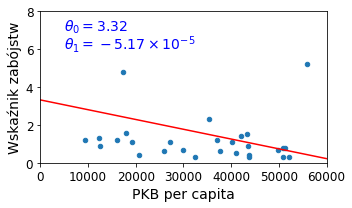

In [300]:
sample_data.plot(kind='scatter', x="PKB per capita", y='Wskaźnik zabójstw', figsize=(5,3))
plt.axis([0, 60000, 0, 8])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t02 + t12*X, "r")
plt.text(5000, 7, r"$\theta_0 = 3.32$", fontsize=14, color="b")
plt.text(5000, 6, r"$\theta_1 = -5.17 \times 10^{-5}$", fontsize=14, color="b")
save_fig('wykres_najlepiej_dopasowanego_modelu')
plt.show()

Zapisywanie rysunku wykres_najlepiej_dopasowanego_modelu


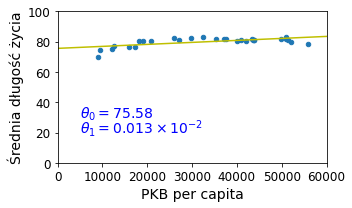

In [301]:
sample_data.plot(kind='scatter', x="PKB per capita", y='Średnia długość życia', figsize=(5,3))
plt.axis([0, 60000, 0, 100])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t03 + t13*X, "y")
plt.text(5000, 30, r"$\theta_0 = 75.58$", fontsize=14, color="b")
plt.text(5000, 20, r"$\theta_1 = 0.013 \times 10^{-2}$", fontsize=14, color="b")
save_fig('wykres_najlepiej_dopasowanego_modelu')
plt.show()


Jak szczęśliwi są Chińczycy? - informacji tej nie znajdziemy w bazie danych OECD...

Możemy posłużyć się modelem, aby uzyskać wiarygodne przewidywania: sprawdzamy wartość PKB per capita dla Chin (7 989 dolarów), a po uruchomieniu modelu dowiadujemy się, że współczynnik satysfakcji z życia oscyluje wokół wartości:

In [302]:
china_gdp_per_capita = gdp_per_capita.loc["China"]["PKB per capita"]
print(china_gdp_per_capita)
china_predicted_life_satisfaction = lin1.predict([[china_gdp_per_capita]])[0][0]
china_predicted_life_satisfaction

7989.72


5.24547146061535

In [303]:
china_predicted_water_quality = lin11.predict([[china_gdp_per_capita]])[0][0]
china_predicted_water_quality

69.97208065060379

In [304]:
china_predicted_homicide_rate = lin12.predict([[china_gdp_per_capita]])[0][0]
china_predicted_homicide_rate

2.91004845318291

In [305]:
china_predicted_life_expectancy = lin13.predict([[china_gdp_per_capita]])[0][0]
china_predicted_life_expectancy

76.63301806449542

Jak szczęśliwi są Cypryjczycy? - informacji tej nie znajdziemy w bazie danych OECD...

Możemy posłużyć się modelem, aby uzyskać wiarygodne przewidywania: sprawdzamy wartość PKB per capita dla Cypru (22587 dolarów), a po uruchomieniu modelu dowiadujemy się, że współczynnik satysfakcji z życia oscyluje wokół wartości:

In [306]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["PKB per capita"]
print(cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0][0]
cyprus_predicted_life_satisfaction

22587.49


5.96244744318815

In [307]:
cyprus_predicted_water_quality = lin11.predict([[cyprus_gdp_per_capita]])[0][0]
cyprus_predicted_water_quality

77.39937927618405

In [308]:
cyprus_predicted_homicide_rate = lin12.predict([[cyprus_gdp_per_capita]])[0][0]
cyprus_predicted_homicide_rate

2.1552220161988043

In [309]:
cyprus_predicted_life_expectancy = lin13.predict([[cyprus_gdp_per_capita]])[0][0]
cyprus_predicted_life_expectancy

78.55404837503336

Jak szczęśliwi są Litwini? - informacji tej nie znajdziemy w bazie danych OECD...

Możemy posłużyć się modelem, aby uzyskać wiarygodne przewidywania: sprawdzamy wartość PKB per capita dla Litwy (14210 dolarów), a po uruchomieniu modelu dowiadujemy się, że współczynnik satysfakcji z życia oscyluje wokół wartości:

In [310]:
litwa_gdp_per_capita = gdp_per_capita.loc["Lithuania"]["PKB per capita"]
print(litwa_gdp_per_capita)
litwa_predicted_life_satisfaction = lin1.predict([[litwa_gdp_per_capita]])[0][0]
litwa_predicted_life_satisfaction

14210.28


5.550997038710706

In [311]:
litwa_predicted_water_quality = lin11.predict([[litwa_gdp_per_capita]])[0][0]
litwa_predicted_water_quality

73.13708165680814

In [312]:
litwa_predicted_homicide_rate = lin12.predict([[litwa_gdp_per_capita]])[0][0]
litwa_predicted_homicide_rate

2.5883936291347265

In [313]:
litwa_predicted_life_expectancy = lin13.predict([[litwa_gdp_per_capita]])[0][0]
litwa_predicted_life_expectancy

77.45162832541334

Zapisywanie rysunku wykres_prognoz_dla_Chin, Cypru i Litwy


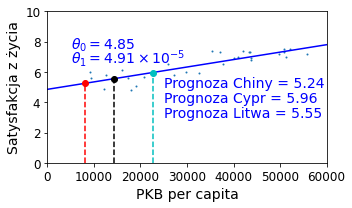

In [314]:
sample_data.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia', figsize=(5,3), s=1)
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([china_gdp_per_capita, china_gdp_per_capita], [0, china_predicted_life_satisfaction], "r--")
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "c--")
plt.plot([litwa_gdp_per_capita, litwa_gdp_per_capita], [0, litwa_predicted_life_satisfaction], "k--")
plt.text(25000, 5.0, r"Prognoza Chiny = 5.24", fontsize=14, color="b")
plt.text(25000, 4.0, r"Prognoza Cypr = 5.96", fontsize=14, color="b")
plt.text(25000, 3.0, r"Prognoza Litwa = 5.55", fontsize=14, color="b")
plt.plot(china_gdp_per_capita, china_predicted_life_satisfaction, "ro")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "co")
plt.plot(litwa_gdp_per_capita, litwa_predicted_life_satisfaction, "ko")
save_fig('wykres_prognoz_dla_Chin, Cypru i Litwy')
plt.show()

Zapisywanie rysunku wykres_prognoz_dla_Chin, Cypru i Litwy


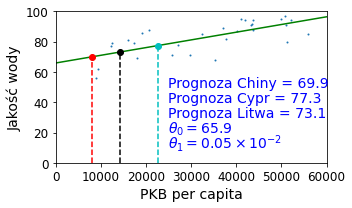

In [315]:
sample_data.plot(kind='scatter', x="PKB per capita", y='Jakość wody', figsize=(5,3), s=1)
X=np.linspace(0, 60000, 1000)
plt.plot(X, t01 + t11*X, "g")
plt.axis([0, 60000, 0, 100])
plt.text(25000, 20, r"$\theta_0 = 65.9$", fontsize=14, color="b")
plt.text(25000, 10, r"$\theta_1 = 0.05 \times 10^{-2}$", fontsize=14, color="b")
plt.plot([china_gdp_per_capita, china_gdp_per_capita], [0, china_predicted_water_quality], "r--")
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_water_quality], "c--")
plt.plot([litwa_gdp_per_capita, litwa_gdp_per_capita], [0, litwa_predicted_water_quality], "k--")
plt.text(25000, 50.0, r"Prognoza Chiny = 69.9", fontsize=14, color="b")
plt.text(25000, 40.0, r"Prognoza Cypr = 77.3", fontsize=14, color="b")
plt.text(25000, 30.0, r"Prognoza Litwa = 73.1", fontsize=14, color="b")
plt.plot(china_gdp_per_capita, china_predicted_water_quality, "ro")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_water_quality, "co")
plt.plot(litwa_gdp_per_capita, litwa_predicted_water_quality, "ko")
save_fig('wykres_prognoz_dla_Chin, Cypru i Litwy')
plt.show()

Zapisywanie rysunku wykres_prognoz_dla_Chin, Cypru i Litwy


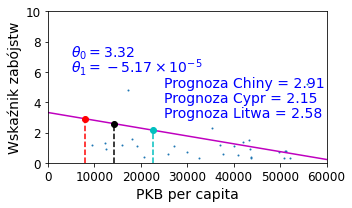

In [316]:
sample_data.plot(kind='scatter', x="PKB per capita", y='Wskaźnik zabójstw', figsize=(5,3), s=1)
X=np.linspace(0, 60000, 1000)
plt.plot(X, t02 + t12*X, "m")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7, r"$\theta_0 = 3.32$", fontsize=14, color="b")
plt.text(5000, 6, r"$\theta_1 = -5.17 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([china_gdp_per_capita, china_gdp_per_capita], [0, china_predicted_homicide_rate], "r--")
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_homicide_rate], "c--")
plt.plot([litwa_gdp_per_capita, litwa_gdp_per_capita], [0, litwa_predicted_homicide_rate], "k--")
plt.text(25000, 5.0, r"Prognoza Chiny = 2.91", fontsize=14, color="b")
plt.text(25000, 4.0, r"Prognoza Cypr = 2.15", fontsize=14, color="b")
plt.text(25000, 3.0, r"Prognoza Litwa = 2.58", fontsize=14, color="b")
plt.plot(china_gdp_per_capita, china_predicted_homicide_rate, "ro")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_homicide_rate, "co")
plt.plot(litwa_gdp_per_capita, litwa_predicted_homicide_rate, "ko")
save_fig('wykres_prognoz_dla_Chin, Cypru i Litwy')
plt.show()

Zapisywanie rysunku wykres_prognoz_dla_Chin, Cypru i Litwy


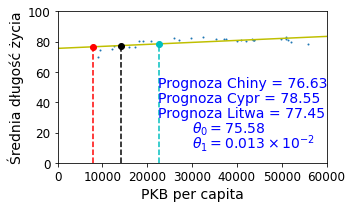

In [317]:
sample_data.plot(kind='scatter', x="PKB per capita", y='Średnia długość życia', figsize=(5,3), s=1)
X=np.linspace(0, 60000, 1000)
plt.plot(X, t03 + t13*X, "y")
plt.axis([0, 60000, 0, 100])
plt.text(30000, 20, r"$\theta_0 = 75.58$", fontsize=14, color="b")
plt.text(30000, 10, r"$\theta_1 = 0.013 \times 10^{-2}$", fontsize=14, color="b")
plt.plot([china_gdp_per_capita, china_gdp_per_capita], [0, china_predicted_life_expectancy], "r--")
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_expectancy], "c--")
plt.plot([litwa_gdp_per_capita, litwa_gdp_per_capita], [0, litwa_predicted_life_expectancy], "k--")
plt.text(22500, 50.0, r"Prognoza Chiny = 76.63", fontsize=14, color="b")
plt.text(22500, 40.0, r"Prognoza Cypr = 78.55", fontsize=14, color="b")
plt.text(22500, 30.0, r"Prognoza Litwa = 77.45", fontsize=14, color="b")
plt.plot(china_gdp_per_capita, china_predicted_life_expectancy, "ro")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_expectancy, "co")
plt.plot(litwa_gdp_per_capita, litwa_predicted_life_expectancy, "ko")
save_fig('wykres_prognoz_dla_Chin, Cypru i Litwy')
plt.show()

Uczenie z przykładów:

Prawdopodobnie najprostszą formą nauki jest „wykuwanie na blachę”. Gdybyśmy stworzyli w ten sposób filtr spamu, oznaczałby po prostu wszystkie wiadomości identyczne z oznakowanymi przez użytkowników — rozwiązanie nie najgorsze, ale zarazem nie najlepsze.

Zamiast oznaczać wiadomości identyczne z rozpoznanym wcześniej spamem, możemy zaprogramować filtr w taki sposób, aby znakował również wiadomości bardzo podobne do powszechnie rozpoznawanych wzorców. Potrzebna staje się jakaś miara podobieństwa dwóch wiadomości e-mail.

Może ją stanowić (w wielkim uproszczeniu) porównanie liczby takich samych słów występujących w obydwu wiadomościach. Filtr mógłby oznaczać wiadomość jako spam, jeśli będzie miała wiele słów wspólnych ze znanym spamem.

Mamy tu do czynienia z uczeniem z przykładów (ang. instance-based learning): system uczy się przykładów„na pamięć”, a następnie porównuje (generalizuje) je z nowymi przypadkami za pomocą miary podobieństwa:
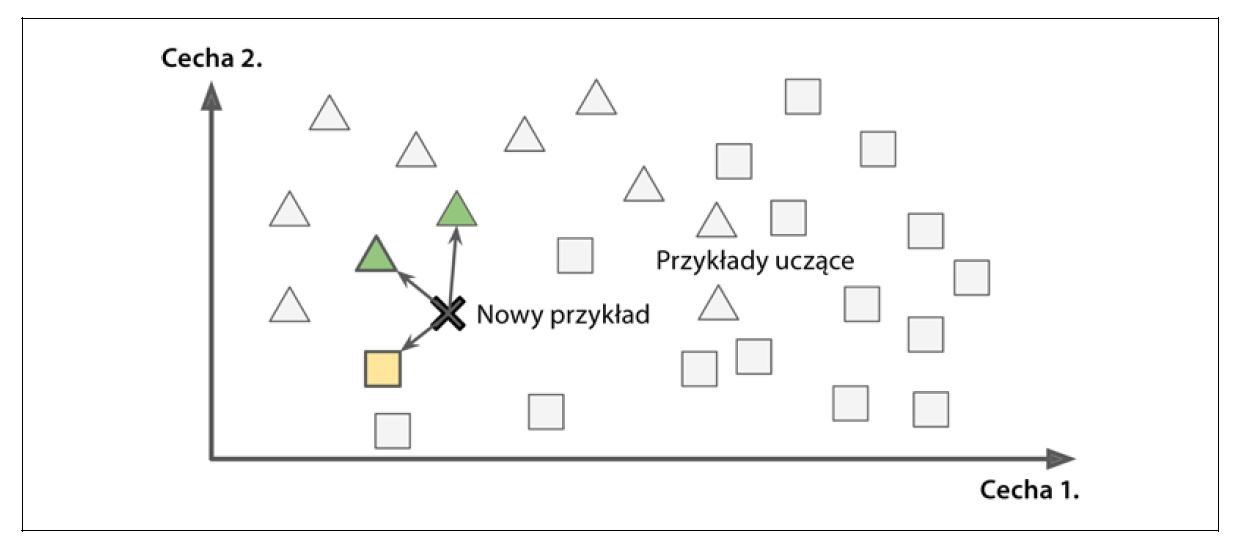

In [318]:
sample_data[7:10]

PKB per capita  Satysfakcja z życia  Jakość wody  Wskaźnik zabójstw  \
Country                                                                         
Portugal       19121.592                  5.1         86.0                1.1   
Slovenia       20732.482                  5.7         88.0                0.4   
Spain          25864.721                  6.5         71.0                0.6   

          Średnia długość życia  
Country                          
Portugal                   80.5  
Slovenia                   80.2  
Spain                      82.5

Algorytmu uczenia z przykładów -> wartość PKB najbardziej zbliżoną do Chin ma Słowenia (20 732 dolary).

Dzięki danym OECD wiemy, że współczynnik satysfakcji z życia wynosi u Słoweńców 5,7, wiec moglibyśmy w drodze analogii stwierdzić, że jego wartość dla Chinczyków powinna być bardzo podobna. 

Po nieznacznym „oddaleniu skali” i przyjrzeniu się dwóm kolejnym państwom o zbliżonej wartości satysfakcji z życia okaże się, że są to Portugalia (5,1) i Hiszpania (6,5). 

Średnia tych trzech wartości wynosi 5,77, co stanowi wartość całkiem zbliżoną do wyliczonej przez nasz model.

Wspomniany tu prosty algorytm nosi nazwę regresji k-najbliższych sąsiadów (ang. k-nearest neighbors); 
w tym przykładzie k = 3.

Aby zastąpić algorytm regresji liniowej algorytmem k-najbliższych sąsiadów, wystarczy podmienić wiersz:

**model = sklearn.linear_model.LinearRegression()**

na następujący:

**model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)**

In [319]:
(5.1+5.7+6.5)/3

5.766666666666667

In [38]:
backup = oecd_bli, gdp_per_capita

def prepare_country_stats(oecd_bli, gdp_per_capita):
    return sample_data

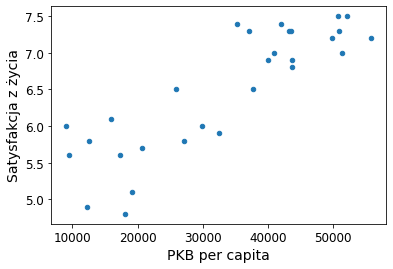

[[5.96242338]]  wyniki satysfakcja z życia Cypru


In [39]:
# Importuje klasy
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

# Wczytuje dane
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Przygotowuje dane
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["PKB per capita"]]
y = np.c_[country_stats["Satysfakcja z życia"]]


# print (country_stats)
# print (sample_data)

# Wizualizuje dane
country_stats.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia')
plt.show()


# Wybiera model liniowy
model = sklearn.linear_model.LinearRegression()

# Uczy model
model.fit(X, y)


# Oblicza prognozę dla Cypru
X_newC = [[22587]]  # PKB per capita Cypru

print(model.predict(X_newC)," wyniki satysfakcja z życia Cypru") # wyniki satysfakcja z życia[[5.96242338]]

**Jeśli wszystko zostało dobrze wykonane, Twój model powinien wyliczać dobre prognozy.**

W przeciwnym wypadku może być konieczne wykorzystanie większej liczby atrybutów (stopy zatrudnienia,zdrowia społeczeństwa, zanieczyszczenia powietrza itd.), zdobycie więcej danych uczących lub danych lepszej jakości, ewentualnie skorzystanie z wydajniejszego modelu (np. algorytmu regresji wielomianowej).

Podsumowując:
- Przeanalizowaliśmy dane.
- Wybraliśmy model.
- Wytrenowaliśmy go na danych uczących (np. algorytm uczący wyszukał wartości parametrów pozwalających na zminimalizowanie funkcji kosztu).
- Na końcu wykorzystaliśmy wytrenowany model do prognozowania wyników dla nowych przypadków (jest to tzw. wnioskowanie) z nadzieją, że będzie on skutecznie generalizował zdobytą wiedzę.

***Tak właśnie wygląda typowy projekt uczenia maszynowego.***

------------------------------------------------
**Główne problemy uczenia maszynowego**

Skoro naszym głównym zadaniem jest dobór algorytmu uczącego i wyuczenie go za pomocą określonych danych, to dwoma największymi zagrożeniami są **„zły algorytm”** i **„złe dane”.**

Zacznijmy od przyjrzenia się niewłaściwym danym.

Aby większość algorytmów działała prawidłowo, należy im zapewnić mnóstwo danych. Nawet w przypadku bardzo prostych problemów należy zazwyczaj dostarczyć tysiące przykładów, natomiast bardziej zaawansowane zagadnienia, takie jak rozpoznawanie mowy, wymagają nawet milionów próbek.

In [322]:
oecd_bli, gdp_per_capita = backup

In [323]:
sample_data

PKB per capita  Satysfakcja z życia  Jakość wody  \
Country                                                             
Russia                 9054.914                  6.0         56.0   
Turkey                 9437.372                  5.6         62.0   
Hungary               12239.894                  4.9         77.0   
Poland                12495.334                  5.8         79.0   
Slovak Republic       15991.736                  6.1         81.0   
Estonia               17288.083                  5.6         79.0   
Greece                18064.288                  4.8         69.0   
Portugal              19121.592                  5.1         86.0   
Slovenia              20732.482                  5.7         88.0   
Spain                 25864.721                  6.5         71.0   
Korea                 27195.197                  5.8         78.0   
Italy                 29866.581                  6.0         71.0   
Japan                 32485.545                  5.9         85.0   
Israel                35343.336                  7.4         68.0   
New Zealand           37044.891                  7.3         89.0   
France                37675.006                  6.5         82.0   
Belgium               40106.632                  6.9         87.0   
Germany               40996.511                  7.0         95.0   
Finland               41973.988                  7.4         94.0   
Canada                43331.961                  7.3         91.0   
Netherlands           43603.115                  7.3         92.0   
Austria               43724.031                  6.9         94.0   
United Kingdom        43770.688                  6.8         88.0   
Sweden                49866.266                  7.2         95.0   
Iceland               50854.583                  7.5         97.0   
Australia             50961.865                  7.3         91.0   
Ireland               51350.744                  7.0         80.0   
Denmark               52114.165                  7.5         94.0   
United States         55805.204                  7.2         85.0   

                 Wskaźnik zabójstw  Średnia długość życia  
Country                                                    
Russia                        12.8                   70.2  
Turkey                         1.2                   74.6  
Hungary                        1.3                   75.2  
Poland                         0.9                   76.9  
Slovak Republic                1.2                   76.2  
Estonia                        4.8                   76.5  
Greece                         1.6                   80.7  
Portugal                       1.1                   80.5  
Slovenia                       0.4                   80.2  
Spain                          0.6                   82.5  
Korea                          1.1                   81.3  
Italy                          0.7                   82.3  
Japan                          0.3                   83.2  
Israel                         2.3                   81.8  
New Zealand                    1.2                   81.5  
France                         0.6                   82.1  
Belgium                        1.1                   80.5  
Germany                        0.5                   81.0  
Finland                        1.4                   80.7  
Canada                         1.5                   81.5  
Netherlands                    0.9                   81.2  
Austria                        0.4                   81.0  
United Kingdom                 0.3                   81.0  
Sweden                         0.7                   81.8  
Iceland                        0.3                   83.0  
Australia                      0.8                   82.1  
Ireland                        0.8                   81.0  
Denmark                        0.3                   80.1  
United States                  5.2                   78.7

In [324]:
missing_data

PKB per capita  Satysfakcja z życia  Jakość wody  \
Country                                                            
Brazil                8669.998                  7.0         72.0   
Mexico                9009.280                  6.7         67.0   
Chile                13340.905                  6.7         73.0   
Czech Republic       17256.918                  6.5         85.0   
Norway               74822.106                  7.4         94.0   
Switzerland          80675.308                  7.5         96.0   
Luxembourg          101994.093                  6.9         86.0   

                Wskaźnik zabójstw  Średnia długość życia  
Country                                                   
Brazil                       25.5                   73.7  
Mexico                       23.4                   74.6  
Chile                         4.4                   78.9  
Czech Republic                0.8                   78.2  
Norway                        0.6                   81.5  
Switzerland                   0.5                   82.8  
Luxembourg                    0.4                   81.5

In [325]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

**Niereprezentatywne dane uczące**

Aby proces uogólniania przebiegał skutecznie, dane uczące muszą być reprezentatywne wobec nowych danych, wobec których nastąpi generalizacja.

Zarówno dla uczenia z przykładów,jak i dla uczenia z modelu.

Na przykład zbiór krajów użyty przez nas do trenowania modelu liniowego nie był doskonale reprezentatywny;
brakuje w nim kilku państw. 

Ponizej widzimy, jak będą wyglądać dane po dodaniu tych kilku brakujących krajów.

Model wyuczony za pomocą tych danych został ukazany w postaci linii ciągłej, natomiast stary model jest reprezentowany przez linię przerywaną.

**Jak widać, dodanie kilku brakujących krajów nie tylko w znaczny sposób modyfikuje dany model, ale pozwala nam również uzmysłowić sobie, że prosty model liniowy raczej nigdy nie będzie bardzo dokładny.**

Wygląda na to, że **mieszkańcy bardzo bogatych państw** nie są szczęśliwsi od ich odpowiedników w średnio zamożnych krajach (wydaje się wręcz,że **są bardziej nieszczęśliwi**), a z kolei ludność wielu ubogich państw wydaje się znacznie szczęśliwsza od populacji bogatych krajów.

Za pomocą niereprezentatywnego zbioru danych wyuczyliśmy model, który raczej nie będzie generował dokładnych prognoz, zwłaszcza w przypadku krajów ubogich i bardzo zamożnych.

Jest niezwykle istotne, aby zbiór danych uczących był reprezentatywny wobec generalizowanych przypadków. Często jest to trudniej osiągnąć, niż się wydaje: jeżeli przykład będzie zbyt mały, musisz liczyć się z zaszumieniem próbkowania (ang. sampling noise; niereprezentatywne dane pojawiają się tu w wyniku przypadku), ale nawet olbrzymie zbiory danych mogą nie być reprezentatywne, jeśli użyta zostanie niewłaściwa metoda próbkowania. W tym przypadku mamy do czynienia z obciążeniem próbkowania (ang. sampling bias).

Zapisywanie rysunku wykres_punktowy_reprezentatywnych_danych_uczących


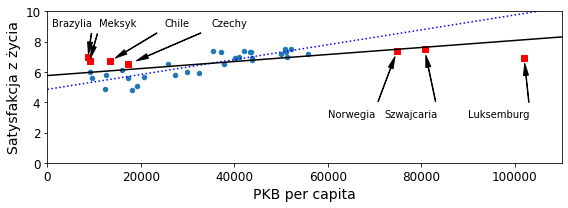

In [326]:
sample_data.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data[['PKB per capita','Satysfakcja z życia']].loc[country]
    country = "Brazylia" if country == "Brazil" else country
    country = "Meksyk" if country == "Mexico" else country
    country = "Czechy" if country == "Czech Republic" else country
    country = "Norwegia" if country == "Norway" else country
    country = "Szwajcaria" if country == "Switzerland" else country
    country = "Luksemburg" if country == "Luxembourg" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats["PKB per capita"]]
yfull = np.c_[full_country_stats["Satysfakcja z życia"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")

save_fig('wykres_punktowy_reprezentatywnych_danych_uczących')
plt.show()

Zapisywanie rysunku wykres_punktowy_reprezentatywnych_danych_uczących


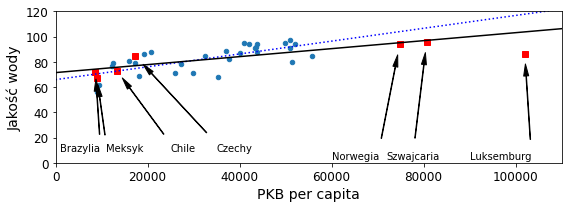

In [327]:
sample_data.plot(kind='scatter', x="PKB per capita", y='Jakość wody', figsize=(8,3))
plt.axis([0, 110000, 0, 120])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data[['PKB per capita','Jakość wody']].loc[country]
    country = "Brazylia" if country == "Brazil" else country
    country = "Meksyk" if country == "Mexico" else country
    country = "Czechy" if country == "Czech Republic" else country
    country = "Norwegia" if country == "Norway" else country
    country = "Szwajcaria" if country == "Switzerland" else country
    country = "Luksemburg" if country == "Luxembourg" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 110000, 1000)
plt.plot(X, t01 + t11*X, "b:")

lin_reg_full1 = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats["PKB per capita"]]
yfull1 = np.c_[full_country_stats["Jakość wody"]]
lin_reg_full1.fit(Xfull, yfull1)

t0full1, t1full1 = lin_reg_full1.intercept_[0], lin_reg_full1.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full1 + t1full1 * X, "k")

save_fig('wykres_punktowy_reprezentatywnych_danych_uczących')
plt.show()

Zapisywanie rysunku wykres_punktowy_reprezentatywnych_danych_uczących


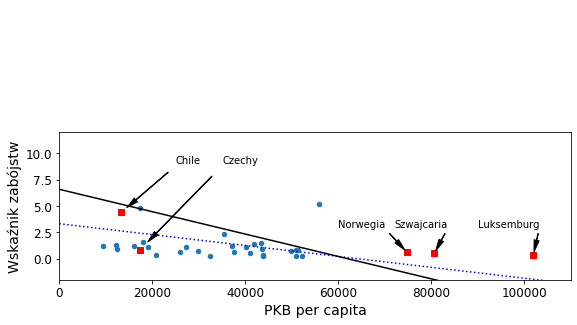

In [328]:
sample_data.plot(kind='scatter', x="PKB per capita", y='Wskaźnik zabójstw', figsize=(8,8))
plt.axis([0, 110000, -2, 12])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data[['PKB per capita','Wskaźnik zabójstw']].loc[country]
    country = "Brazylia" if country == "Brazil" else country
    country = "Meksyk" if country == "Mexico" else country
    country = "Czechy" if country == "Czech Republic" else country
    country = "Norwegia" if country == "Norway" else country
    country = "Szwajcaria" if country == "Switzerland" else country
    country = "Luksemburg" if country == "Luxembourg" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 110000, 1000)
plt.plot(X, t02 + t12*X, "b:")

lin_reg_full2 = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats["PKB per capita"]]
yfull2 = np.c_[full_country_stats["Wskaźnik zabójstw"]]
lin_reg_full2.fit(Xfull, yfull2)

t0full2, t1full2 = lin_reg_full2.intercept_[0], lin_reg_full2.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full2 + t1full2 * X, "k")

save_fig('wykres_punktowy_reprezentatywnych_danych_uczących')
plt.show()

Zapisywanie rysunku wykres_punktowy_reprezentatywnych_danych_uczących


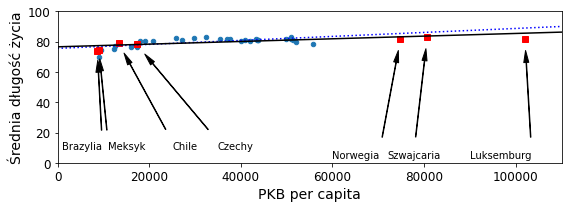

In [329]:
sample_data.plot(kind='scatter', x="PKB per capita", y='Średnia długość życia', figsize=(8,3))
plt.axis([0, 110000, 0, 100])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data[['PKB per capita','Średnia długość życia']].loc[country]
    country = "Brazylia" if country == "Brazil" else country
    country = "Meksyk" if country == "Mexico" else country
    country = "Czechy" if country == "Czech Republic" else country
    country = "Norwegia" if country == "Norway" else country
    country = "Szwajcaria" if country == "Switzerland" else country
    country = "Luksemburg" if country == "Luxembourg" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 110000, 1000)
plt.plot(X, t03 + t13*X, "b:")

lin_reg_full3 = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats["PKB per capita"]]
yfull3 = np.c_[full_country_stats["Średnia długość życia"]]
lin_reg_full3.fit(Xfull, yfull3)

t0full3, t1full3 = lin_reg_full3.intercept_[0], lin_reg_full3.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full3 + t1full3 * X, "k")

save_fig('wykres_punktowy_reprezentatywnych_danych_uczących')
plt.show()

----------------------------------------
**Przetrenowanie danych uczących**

Ludzie często mają tendencję do nadmiernego generalizowania i, niestety, maszyny równie łatwo wpadają w tę pułapkę, jeśli nie zachowamy ostrożności. 

Zjawisko to w terminologii uczenia maszynowego nosi nazwę przetrenowania albo nadmiernego dopasowania (ang. overfitting). 

Termin ten oznacza, że model sprawdza się w przypadku danych uczących, ale sam proces uogólniania nie
sprawuje się zbyt dobrze.

Na kolejnym rysunku widzimy przykład wielomianowego modelu satysfakcji z życia o olbrzymim stopniu
przetrenowania za pomocą danych uczących. Nawet jeśli sprawuje się on znacznie lepiej wobec
danych uczących niż zwykły model liniowy, to czy moglibyśmy zawierzyć jego prognozom?

Jeżeli zbiór danych uczących jest zaszumiony lub zbyt mały (ryzyko zaszumienia próbkowania),
to model ten prawdopodobnie będzie wykrywał wzorce nie w użytecznych danych, lecz w szumie.

C:\Users\Karol\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
C:\Users\Karol\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Zapisywanie rysunku wykres_przetrenowanego_modelu


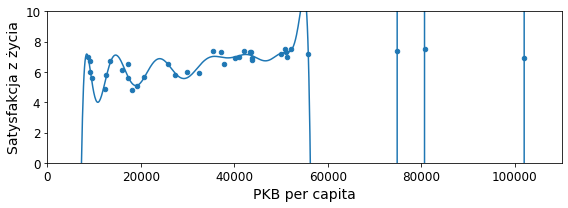

In [330]:
full_country_stats.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z życia', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
save_fig('wykres_przetrenowanego_modelu')
plt.show()

**Zjawisko przetrenowania występuje, gdy model jest zbyt skomplikowany w porównaniu do ilości lub zaszumienia danych uczących.**

W takich przypadkach możliwe są następujące rozwiązania:
- uproszczenie modelu poprzez wybór zawierającego mniej parametrów (np. modelu liniowego w miejsce modelu wielomianowego), zmniejszenie liczby atrybutów w danych uczących lub ograniczenie modelu,
- uzyskanie większej ilości danych uczących,
- zmniejszenie zaszumienia danych uczących (np. poprzez usunięcie błędnych danych lub elementów odstających).

**Ograniczenie modelu w celu jego uproszczenia i zmniejszenia ryzyka przetrenowania nosi nazwę regularyzacji (ang. regularization).**

In [331]:
full_country_stats.loc[[c for c in full_country_stats.index if "W" in c.upper()]]["Satysfakcja z życia"]

Country
New Zealand    7.3
Sweden         7.2
Norway         7.4
Switzerland    7.5
Name: Satysfakcja z życia, dtype: float64

Powiedzmy, że dostarczamy modelowi satysfakcji z życia wiele dodatkowych atrybutów, w tym takich nieprzydatnych, jak nazwy państw. W takiej sytuacji złożony model może wykrywać takie wzorce, jak np. wskaźnik satysfakcji z życia przekraczający wartość 7 w krajach mających w nazwie literę „w”: Nowa Zelandia (7,3), Norwegia(7,4), Szwecja (7,2)czy Szwajcaria (7,5). 

Czy mamy pewność, że ta „reguła litery »w«” dotyczy również takich państw, jak Rwanda lub Zimbabwe? Oczywiście, wzorzec ten wystąpił w danych uczących zupełnie przypadkowo, ale model nie jest w stanie stwierdzić, czy taki szablon  jest rzeczywisty,czy stanowi wynik zaszumienia danych.

In [332]:
gdp_per_capita.loc[[c for c in gdp_per_capita.index if "W" in c.upper()]].head()

Subject Descriptor         Units  \
Country                                                                        
Botswana     Gross domestic product per capita, current prices  U.S. dollars   
Kuwait       Gross domestic product per capita, current prices  U.S. dollars   
Malawi       Gross domestic product per capita, current prices  U.S. dollars   
New Zealand  Gross domestic product per capita, current prices  U.S. dollars   
Norway       Gross domestic product per capita, current prices  U.S. dollars   

             Scale                      Country/Series-specific Notes  \
Country                                                                 
Botswana     Units  See notes for:  Gross domestic product, curren...   
Kuwait       Units  See notes for:  Gross domestic product, curren...   
Malawi       Units  See notes for:  Gross domestic product, curren...   
New Zealand  Units  See notes for:  Gross domestic product, curren...   
Norway       Units  See notes for:  Gross domestic product, curren...   

             PKB per capita  Estimates Start After  
Country                                             
Botswana           6040.957                 2008.0  
Kuwait            29363.027                 2014.0  
Malawi              354.275                 2011.0  
New Zealand       37044.891                 2015.0  
Norway            74822.106                 2015.0

Poniszy rysunek prezentuje trzy modele: linia kropkowana symbolizuje nasz oryginalny model wytrenowany pod nieobecność kilku krajów, linia kreskowana ukazuje nasz model wyuczony przy użyciu pełnego zakresu danych, natomiast linia ciągła reprezentuje model wytrenowany za pomocą takich samych danych, jak w pierwszym przypadku, ale przy wprowadzonej regularyzacji. 

Widzimy,że w wyniku regularyzacji funkcja ma trochę mniejsze nachylenie, co sprawia, że jest nieco mniejdopasowana do danych uczących, ale za to sprawuje się lepiej w procesie uogólniania nowych przykładów

Zapisywanie rysunku wykres_modelu_grzbietowego


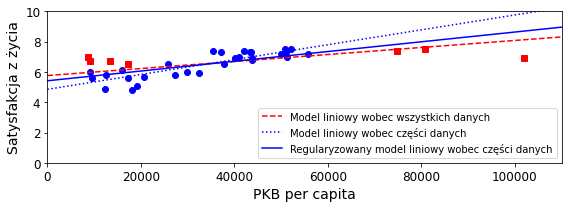

In [333]:
plt.figure(figsize=(8,3))

plt.xlabel("PKB per capita")
plt.ylabel('Satysfakcja z życia')

plt.plot(list(sample_data["PKB per capita"]), list(sample_data["Satysfakcja z życia"]), "bo")
plt.plot(list(missing_data["PKB per capita"]), list(missing_data["Satysfakcja z życia"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Model liniowy wobec wszystkich danych")
plt.plot(X, t0 + t1*X, "b:", label="Model liniowy wobec części danych")

ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["PKB per capita"]]
ysample = np.c_[sample_data["Satysfakcja z życia"]]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularyzowany model liniowy wobec części danych")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
save_fig('wykres_modelu_grzbietowego')
plt.show()

Zapisywanie rysunku wykres_modelu_grzbietowego


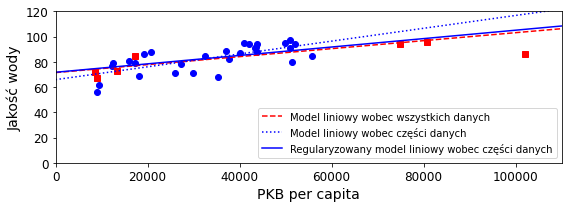

In [334]:
plt.figure(figsize=(8,3))

plt.xlabel("PKB per capita")
plt.ylabel('Jakość wody')

plt.plot(list(sample_data["PKB per capita"]), list(sample_data["Jakość wody"]), "bo")
plt.plot(list(missing_data["PKB per capita"]), list(missing_data["Jakość wody"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full1 + t1full1 * X, "r--", label="Model liniowy wobec wszystkich danych")
plt.plot(X, t01 + t11*X, "b:", label="Model liniowy wobec części danych")

ridge1 = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["PKB per capita"]]
ysample1 = np.c_[sample_data["Jakość wody"]]
ridge1.fit(Xsample, ysample1)
t0ridge1, t1ridge1 = ridge1.intercept_[0], ridge1.coef_[0][0]
plt.plot(X, t0ridge1 + t1ridge1 * X, "b", label="Regularyzowany model liniowy wobec części danych")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 120])
save_fig('wykres_modelu_grzbietowego')
plt.show()

Zapisywanie rysunku wykres_modelu_grzbietowego


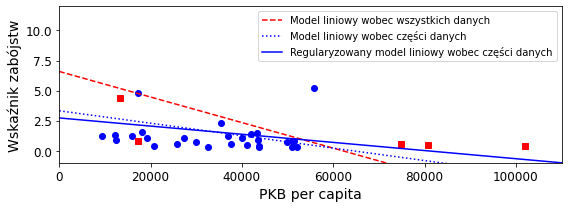

In [335]:
plt.figure(figsize=(8,3))

plt.xlabel("PKB per capita")
plt.ylabel('Wskaźnik zabójstw')

plt.plot(list(sample_data["PKB per capita"]), list(sample_data["Wskaźnik zabójstw"]), "bo")
plt.plot(list(missing_data["PKB per capita"]), list(missing_data["Wskaźnik zabójstw"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full2 + t1full2 * X, "r--", label="Model liniowy wobec wszystkich danych")
plt.plot(X, t02 + t12*X, "b:", label="Model liniowy wobec części danych")

ridge2 = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["PKB per capita"]]
ysample2 = np.c_[sample_data["Wskaźnik zabójstw"]]
ridge2.fit(Xsample, ysample2)
t0ridge2, t1ridge2= ridge2.intercept_[0], ridge2.coef_[0][0]
plt.plot(X, t0ridge2 + t1ridge2 * X, "b", label="Regularyzowany model liniowy wobec części danych")

plt.legend(loc="upper right")
plt.axis([0, 110000, -1, 12])
save_fig('wykres_modelu_grzbietowego')
plt.show()

Zapisywanie rysunku wykres_modelu_grzbietowego


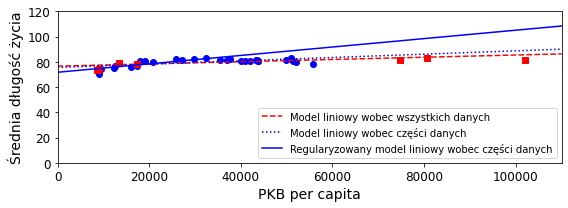

In [336]:
plt.figure(figsize=(8,3))

plt.xlabel("PKB per capita")
plt.ylabel('Średnia długość życia')

plt.plot(list(sample_data["PKB per capita"]), list(sample_data["Średnia długość życia"]), "bo")
plt.plot(list(missing_data["PKB per capita"]), list(missing_data["Średnia długość życia"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full3 + t1full3 * X, "r--", label="Model liniowy wobec wszystkich danych")
plt.plot(X, t03 + t13*X, "b:", label="Model liniowy wobec części danych")

ridge3 = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["PKB per capita"]]
ysample3 = np.c_[sample_data["Średnia długość życia"]]
ridge3.fit(Xsample, ysample1)
t0ridge3, t1ridge3 = ridge3.intercept_[0], ridge3.coef_[0][0]
plt.plot(X, t0ridge3 + t1ridge3 * X, "b", label="Regularyzowany model liniowy wobec części danych")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 120])
save_fig('wykres_modelu_grzbietowego')
plt.show()

**Stopień regularyzacji przeprowadzanej na etapie nauki możemy kontrolować za pomocą hiperparametrów(ang. hyperparameters), są to parametry algorytmu uczącego (nie całego modelu).**

Nie są one modyfikowane przez sam algorytm uczący; należy je wyznaczyć tuż przed rozpoczęciem procesu uczenia i w jego trakcie ich wartości pozostają niezmienne. 

Jeśli wyznaczysz bardzo dużą wartość hiperparametru regularyzacji, uzyskana funkcja będzie niemal płaska (będzie miała niemal zerowe nachylenie); algorytm uczący prawie na pewno nie ulegnie przetrenowaniu, ale jednocześnie trudniej będzie mu znaleźć prawidłowe rozwiązanie.

Strojenie hiperparametrów stanowi istotną część tworzenia systemu uczenia maszynowego, ale o tym poźniej...

In [337]:
backup = oecd_bli, gdp_per_capita

def prepare_country_stats(oecd_bli, gdp_per_capita):
    return sample_data

In [338]:
# Zastępuje ten model liniowy:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()

In [339]:
# modelem regresji k-najbliższych sąsiadów:
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model2 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model3 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)


In [340]:
X = np.c_[country_stats["PKB per capita"]]
y = np.c_[country_stats["Satysfakcja z życia"]]
y1 = np.c_[country_stats["Jakość wody"]]
y2 = np.c_[country_stats["Wskaźnik zabójstw"]]
y3 = np.c_[country_stats["Średnia długość życia"]]

# Uczy model
model.fit(X, y)
model1.fit(X, y1)
model2.fit(X, y2)
model3.fit(X, y3)



# Oblicza prognozę dla Chin
X_new = [[7989]]  # PKB per capita Chin

print(model.predict(X_new)," wyniki satysfakcja z życia Chin") # wyniki satysfakcja z życia[[5.5]]
print(model1.predict(X_new)," wyniki jakość wody Chin") # wyniki jakość wody [[65.]]
print(model2.predict(X_new)," wyniki wskaźnik zabójstw Chin") # wyniki wskaźnik zabójstw[[5.1]]
print(model3.predict(X_new)," wyniki średnia długość życia Chin") # wyniki średnia długość życia[[73.33333333]]

# Oblicza prognozę dla Cypru
X_newC = [[22587]]  # PKB per capita Cypru

print(model.predict(X_newC)," wyniki satysfakcja z życia Cypru") # wyniki satysfakcja z życia[[5.76666667]]
print(model1.predict(X_newC)," wyniki jakość wody Cypru") # wyniki jakość wody [[81.66666667]]
print(model2.predict(X_newC)," wyniki wskaźnik zabójstw Cypru") # wyniki wskaźnik zabójstw [[0.7]]
print(model3.predict(X_newC)," wyniki średnia długość życia Cypru") # wyniki średnia długość życia[[81.06666667]]

# Oblicza prognozę dla Litwy
X_newL = [[14210]]  # PKB per capita Litwy

print(model.predict(X_newL)," wyniki satysfakcja z życia Litwy ") # wyniki satysfakcja z życia[[5.6]]
print(model1.predict(X_newL)," wyniki jakość wody Litwy") # wyniki jakość wody [[79.]]
print(model2.predict(X_newL)," wyniki wskaźnik zabójstw Litwy ") # wyniki wskaźnik zabójstw [[1.13333333]] 
print(model3.predict(X_newL)," wyniki średnia długość życia Litwy ") # wyniki średnia długość życia[[76.1]]


[[5.5]]  wyniki satysfakcja z życia Chin
[[65.]]  wyniki jakość wody Chin
[[5.1]]  wyniki wskaźnik zabójstw Chin
[[73.33333333]]  wyniki średnia długość życia Chin
[[5.76666667]]  wyniki satysfakcja z życia Cypru
[[81.66666667]]  wyniki jakość wody Cypru
[[0.7]]  wyniki wskaźnik zabójstw Cypru
[[81.06666667]]  wyniki średnia długość życia Cypru
[[5.6]]  wyniki satysfakcja z życia Litwy 
[[79.]]  wyniki jakość wody Litwy
[[1.13333333]]  wyniki wskaźnik zabójstw Litwy 
[[76.1]]  wyniki średnia długość życia Litwy 


Wiemy już coraz więcej na temat uczenia maszynowego. 

- Uczenie maszynowe polega na ciągłym usprawnianiu wykonywania zadań przez urządzenie poprzez jego uczenie się z danych, a nie jawne dopisywanie nowych reguł do kodu.

- Istnieje wiele różnych metod uczenia maszynowego: nadzorowane, nienadzorowane, wsadowe, przyrostowe, z przykładów, z modelu itd.

- W projekcie uczenia maszynowego gromadzimy dane w zbiorze uczącym, który następnie dostarczamy algorytmowi uczącemu. Jeśli wykorzystujemy technikę uczenia z modelu, pewne parametry zostają dostrojone do zbioru danych uczących (np. w celu uzyskiwania dokładnych prognoz wobec samych danych uczących), dzięki czemu model ten może również dobrze przewidywać wyniki wobec nowych przykładów. Z kolei w metodach uczenia z przykładów próbki zostają po prostu wyuczone „na pamięć”, a model wykorzystuje miarę podobieństwa do uogólniania wyników na nowe przykłady.
- System nie będzie dobrze spełniał swojego zadania, jeżeli zbiór danych testowych jest zbyt mały,same dane są niereprezentatywne, zaszumione lub zaśmiecone nieistotnymi cechami (z gipsu tortu nie ulepisz). Model nie może być również zbyt prosty (niedotrenowanie) ani zbyt skomplikowany(przetrenowanie).

----------------------------------
**WAŻNE**
Po wyuczeniu modelu nie wystarczy sama nadzieja na skuteczne uogólnianie nowych próbek. Trzeba ocenić wydajność modelu i w razie potrzeby dostroić go do swoich potrzeb.

---------------------------
Jedynym sposobem sprawdzenia, jak dobrze model generalizuje wyniki, jest wypróbowanie go na nowych danych. 

Możemy, na przykład, zaimplementować go w środowisku produkcyjnym i monitorować jego wydajność. Jest to skuteczne rozwiązanie, ale jeśli model okaże się beznadziejny, użytkownicy będą narzekać...

Najlepszym pomysłem jest podział danych na dwa zestawy: zbiór uczący (ang. training set) i zbiór testowy (ang. test set). Zgodnie z tymi nazwami, model trenujemy za pomocą zbioru uczącego, a sprawdzamy przy użyciu zbioru testowego. Współczynnik błędu uzyskiwany dla nowych przykładów nosi nazwę błędu uogólniania (lub błędu generalizacji), a dzięki zbiorowi testowemu możemy oszacować jego wartość. Parametr ten mówi nam również, jak dobrze model będzie się spisywał
wobec nieznanych danych.

Jeśli wartość błędu uczenia jest niewielka (tzn. model rzadko się myli wobec zbioru uczącego), ale błąd uogólniania jest duży, oznacza to, że model jest przetrenowany. 

Zazwyczaj na zbiór uczący składa się 80% danych, a pozostałe 20% przechowujemy w celu testowania.

Zatem ocena modelu nie jest wcale taka trudna: wystarczy użyć zbioru testowego. Załóżmy teraz,że wahamy się przy wyborze jednego z dwóch modeli (np. pomiędzy wyborem modelu liniowego a wielomianowego): 

Jednym z rozwiązań jest wyuczenie obydwu modeli i sprawdzenie, jak sobie radzą z uogólnianiem wobec zbioru testowego. 

Przyjmijmy teraz, że model liniowy radzi sobie lepiej z uogólnianiem, ale chcesz wprowadzić regularyzację
w celu uniknięcia przetrenowania. 

Ale w jaki sposób dobrać wartość hiperparametru regularyzacji? 

Możesz na przykład wytrenować 100 różnych modeli, z których każdy będzie miał inną wartość tego hiperparametru. 

Załóżmy, że znajdziesz optymalną wartość tego hiperparametru, dającą model o najniższym błędzie generalizacji (np. rzędu 5%).

Zatem wprowadzasz ten model do środowiska produkcyjnego, ale niestety, sprawuje się on poniżejoczekiwań i generuje 15% błędów. 

Co się właściwie stało?

Problem polega na tym, że wielokrotnie mierzyłaś/mierzyłeś błąd uogólniania wobec zbioru testowego i dostosowałaś/dostosowałeś go do tych danych. Oznacza to, że teraz prawdopodobnie model ten nie będzie sobie radził zbyt dobrze z nowymi próbkami.

Powszechnie stosowanym rozwiązaniem tego problemu jest odłożenie jeszcze jednego zbioru danych, zwanego zbiorem walidacyjnym (ang. validation set). 

Trenujemy wiele modeli mających różne wartości hiperparametrów za pomocą zbioru uczącego, dobieramy model i hiperparametry najlepiej sprawujące się wobec zbioru walidacyjnego, a gdy uzyskiwane wyniki będą Cię zadowalać, wystarczy przeprowadzić ostatni sprawdzian wobec zbioru testowego, aby oszacować wartość błędu uogólniania.

Aby uniknąć „zużywania” zbyt dużej ilości danych uczących na zbiór walidacyjny, możesz skorzystać z techniki zwanej sprawdzianem krzyżowym lub kroswalidacją (ang. cross-validation): zbiór uczący zostaje rozdzielony na wzajemnie uzupełniające się podzbiory; każdy model jest uczony za pomocą różnych kombinacji tych podzbiorów i oceniany przy użyciu pozostałych, nieużytych podzestawów.

Po dobraniu rodzaju i hiperparametrów modelu ostateczny model zostaje wytrenowany wobec pełnego zbioru uczącego, a błąd uogólniania określamy przy użyciu zbioru testowego.

"
**Twierdzenie o nieistnieniu darmowych obiadów**

Model stanowi uproszczoną postać obserwacji. Uproszczenia wynikają z konieczności unikania niepotrzebnych szczegółów, które nie ułatwiają procesu uogólniania. Podczas dobierania i odrzucania danych musimy jednak przyjmować założenia. Na przykład w modelu liniowym zakładamy, że dane są, nomen omen, liniowe, a odległość pomiędzy przykładami i wykresem funkcji stanowi wyłącznie szum, który możemy bezpiecznie zignorować.

W słynnej publikacji z 1996 roku13 (http://http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.390.9412&rep=rep1&type=pdf) David Wolpert udowodnił, że jeśli nie przyjmiemy jakichkolwiek założeń dotyczących danych, to okaże się, że żaden model nie będzie lepszy od pozostałych. Jest to tak zwane twierdzenie o nieistnieniu darmowych obiadów (ang. No Free Lunch Theorem — NFL). Dla pewnych zbiorów danych najlepiej nadaje się model liniowy, natomiast dla innych — sieci neuronowe. Nie istnieje żaden model, który z założenia będzie działał lepiej (stąd nazwa twierdzenia). Jedynie poprzez ocenę działania każdego modelu możemy przekonać się, który z nich będzie sprawował się najlepiej. Jest to niewykonalne, dlatego w praktyce przyjmujemy rozsądne założenia dotyczące danych i oceniamy działanie tylko kilku rozsądnie dobranych modeli. Na przykład wobec prostych zadań możemy ocenić działanie modeli liniowych różniących się stopniem regularyzacji, a bardziej skomplikowane problemy możemy przetestować
przy użyciu sieci neuronowych."